In [1]:
%load_ext watermark
%watermark

2020-10-12T20:57:02-05:00

CPython 3.7.6
IPython 7.12.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [2]:
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12) # 10 pulgadas de ancho y 10 de alto para todos los plots

### Lectura de datos

In [4]:
vehiculos = pd.read_csv('../../_data/vehiculos.1.procesado_inicial.csv')

In [5]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


En este paso vamos a agregar aquellas variables que se puedan agregar en tipos más genéricos. Esto ayuda a analizar los por grupos en vez de por elementos individuales.

Para ello podemos ver el numero de valores distintos que cada variable categorica tiene

In [6]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

unique_col_values(vehiculos)

fabricante | 133 | object
modelo | 3791 | object
year | 35 | int64
desplazamiento | 67 | float64
cilindros | 10 | float64
transmision | 38 | object
traccion | 8 | object
clase | 34 | object
combustible | 14 | object
consumo | 84 | int64
co2 | 597 | float64


### Agrupacion de variables categoricas

##### Clase de vehiculo

In [7]:
vehiculos.clase.unique()

array(['Special Purpose Vehicle 2WD', 'Midsize Cars', 'Subcompact Cars',
       'Compact Cars', 'Sport Utility Vehicle - 4WD',
       'Small Sport Utility Vehicle 2WD',
       'Small Sport Utility Vehicle 4WD', 'Two Seaters',
       'Sport Utility Vehicle - 2WD', 'Special Purpose Vehicles',
       'Special Purpose Vehicle 4WD', 'Small Station Wagons',
       'Minicompact Cars', 'Midsize-Large Station Wagons',
       'Midsize Station Wagons', 'Large Cars',
       'Standard Sport Utility Vehicle 4WD',
       'Standard Sport Utility Vehicle 2WD', 'Minivan - 4WD',
       'Minivan - 2WD', 'Vans', 'Vans, Cargo Type',
       'Vans, Passenger Type', 'Standard Pickup Trucks 2WD',
       'Standard Pickup Trucks', 'Standard Pickup Trucks/2wd',
       'Small Pickup Trucks 2WD', 'Standard Pickup Trucks 4WD',
       'Small Pickup Trucks 4WD', 'Small Pickup Trucks', 'Vans Passenger',
       'Special Purpose Vehicle', 'Special Purpose Vehicles/2wd',
       'Special Purpose Vehicles/4wd'], dtype=object

In [8]:
pequeno = ['Compact Cars','Subcompact Cars','Two Seaters','Minicompact Cars']
medio = ['Midsize Cars']
grande = ['Large Cars']

vehiculos.loc[vehiculos['clase'].isin(pequeno), 
             'clase_tipo'] = 'Coches pequeños'

vehiculos.loc[vehiculos['clase'].isin(medio), 
             'clase_tipo'] = 'Coches Medianos'

vehiculos.loc[vehiculos['clase'].isin(grande), 
             'clase_tipo'] = 'Coches Grandes'

vehiculos.loc[vehiculos['clase'].str.contains('Truck'), 
             'clase_tipo'] = 'Camionetas'

vehiculos.loc[vehiculos['clase'].str.contains('Special Purpose'), 
             'clase_tipo'] = 'Vehículos Especiales'

vehiculos.loc[vehiculos['clase'].str.contains('Sport Utility'), 
             'clase_tipo'] = 'Deportivos'

vehiculos.loc[vehiculos['clase'].str.contains('Station'), 
             'clase_tipo'] = 'Coche Familiar'

vehiculos.loc[(vehiculos['clase'].str.lower().str.contains('van')),
             'clase_tipo'] = 'Furgoneta'

In [9]:
vehiculos.clase_tipo = vehiculos.clase_tipo.astype("category")

In [10]:
vehiculos.clase_tipo.dtype

CategoricalDtype(categories=['Camionetas', 'Coche Familiar', 'Coches Grandes',
                  'Coches Medianos', 'Coches pequeños', 'Deportivos',
                  'Furgoneta', 'Vehículos Especiales'],
                 ordered=False)

In [11]:
vehiculos.clase_tipo.value_counts()

Coches pequeños         13648
Camionetas               5717
Deportivos               5330
Coches Medianos          4441
Coche Familiar           2694
Vehículos Especiales     2385
Furgoneta                2286
Coches Grandes           1935
Name: clase_tipo, dtype: int64

##### Traccion

In [12]:
vehiculos.traccion.unique()

array(['2-Wheel Drive', 'Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', 'All-Wheel Drive', nan,
       '4-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)

In [13]:
vehiculos["traccion_tipo"] = "dos"
vehiculos["traccion_tipo"][vehiculos.traccion.isin([
    "4-Wheel or All-Wheel Drive", "All-Wheel Drive",
    "4-Wheel Drive", "Part-time 4-Wheel Drive"
])] = "cuatro"

C:\Users\Le_an\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
pd.set_option('chained_assignment',None)

In [15]:
vehiculos["traccion_tipo"] = "dos"

vehiculos.loc[vehiculos.traccion.isin([
    "4-Wheel or All-Wheel Drive", "All-Wheel Drive",
    "4-Wheel Drive", "Part-time 4-Wheel Drive"
]), "traccion_tipo"] = "cuatro"

##### Transmision

In [16]:
vehiculos.transmision.unique()

array(['Automatic 3-spd', 'Automatic 4-spd', 'Manual 5-spd',
       'Automatic (S5)', 'Manual 6-spd', 'Automatic 5-spd',
       'Automatic (AM8)', 'Automatic (AM-S8)', 'Automatic (AV-S7)',
       'Automatic (S6)', 'Automatic (S9)', 'Automatic (AM-S7)',
       'Automatic (S4)', 'Automatic (AM-S9)', 'Automatic (S7)',
       'Automatic (AM7)', 'Automatic (AM6)', 'Automatic 6-spd',
       'Automatic 8-spd', 'Manual 4-spd', 'Automatic (S8)',
       'Manual 7-spd', 'Automatic (AM-S6)', 'Auto(AM-S6)',
       'Automatic (variable gear ratios)', 'Automatic (AV-S8)',
       'Automatic (A1)', 'Automatic (AV-S6)', 'Manual 3-spd',
       'Automatic (S10)', 'Automatic 9-spd', 'Manual 4-spd Doubled', nan,
       'Automatic (L4)', 'Automatic (L3)', 'Automatic (AV-S10)',
       'Automatic 7-spd', 'Automatic (AM5)'], dtype=object)

In [17]:
vehiculos['transmision_tipo'] = "Automatica"

vehiculos.loc[vehiculos['transmision'].str.startswith('M'),
             'transmision_tipo'] = "Manual"

ValueError: cannot mask with array containing NA / NaN values

In [18]:
vehiculos[vehiculos['transmision'].isnull()]

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo
13374,Ford,Explorer USPS Electric,2001,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,39,0.000000,Deportivos,dos,Automatica
13375,Ford,Explorer USPS Electric,2002,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,39,0.000000,Deportivos,dos,Automatica
13423,Ford,F150 Pickup 2WD,1984,5.8,8.0,NaN,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,11,807.909091,Camionetas,dos,Automatica
15209,Ford,Th!nk,2001,NaN,NaN,NaN,NaN,Two Seaters,Electricity,65,0.000000,Coches pequeños,dos,Automatica
15458,GMC,C25 Pickup 2WD,1984,4.1,6.0,NaN,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,14,634.785714,Camionetas,dos,Automatica
27984,Nissan,Altra EV,2000,NaN,NaN,NaN,NaN,Midsize Station Wagons,Electricity,85,0.000000,Coche Familiar,dos,Automatica
28202,Nissan,Hyper-Mini,2001,NaN,NaN,NaN,NaN,Two Seaters,Electricity,75,0.000000,Coches pequeños,dos,Automatica
35703,Toyota,RAV4 EV,2000,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,72,0.000000,Deportivos,dos,Automatica
35704,Toyota,RAV4 EV,2001,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,72,0.000000,Deportivos,dos,Automatica
35705,Toyota,RAV4 EV,2002,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,78,0.000000,Deportivos,dos,Automatica


In [19]:
vehiculos['transmision_tipo'] = "Automatica"
vehiculos['transmision_tipo'][
    (vehiculos['transmision'].notnull()) & (vehiculos['transmision'].str.startswith('M'))
] = "Manual"

In [20]:
vehiculos.transmision_tipo = vehiculos.transmision_tipo.astype("category")

In [21]:
vehiculos.transmision_tipo.value_counts()

Automatica    25975
Manual        12461
Name: transmision_tipo, dtype: int64

##### Combustible

In [22]:
vehiculos.combustible.value_counts()

Regular                        25356
Premium                        10334
Gasoline or E85                 1227
Diesel                          1021
Electricity                      139
Premium or E85                   124
Midgrade                          77
CNG                               60
Premium and Electricity           30
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: combustible, dtype: int64

In [23]:
vehiculos['combustible_tipo'] = 'Otros tipos de combustible'
vehiculos.loc[vehiculos['combustible']=='Regular',
             'combustible_tipo'] = 'Normal'
vehiculos.loc[vehiculos['combustible']=='Premium',
             'combustible_tipo'] = 'Premium'

vehiculos.loc[vehiculos['combustible'].str.contains('Electricity'),
             'combustible_tipo'] = 'Hibrido'

In [24]:
vehiculos.combustible_tipo = vehiculos.combustible_tipo.astype("category")

In [25]:
vehiculos.combustible_tipo.value_counts()

Normal                        25356
Premium                       10334
Otros tipos de combustible     2537
Hibrido                         209
Name: combustible_tipo, dtype: int64

In [26]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehículos Especiales,dos,Automatica,Normal


### Agrupar variables continuas.

Una manera sencilla de convertir variables continuas en otras categoricas es mediante el uso de quintiles.

In [27]:
tipos_tamaño_motor = ['muy pequeño',"pequeño",  "mediano", "grande", "muy grande"]

vehiculos['tamano_motor_tipo'] = pd.qcut(vehiculos['desplazamiento'],
                                  5, tipos_tamaño_motor)

In [28]:
tipos_consumo = ['muy bajo', 'bajo', 'moderado', 'alto', 'muy alto']

vehiculos['consumo_tipo'] = pd.qcut(vehiculos['consumo'],
                                  5, tipos_consumo)

In [29]:
tipos_co2 = ['muy bajo', 'bajo', 'moderado', 'alto', 'muy alto']

vehiculos['co2_tipo'] = pd.qcut(vehiculos['co2'],
                                  5, tipos_co2)

In [30]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,bajo,alto
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,bajo,alto
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy bajo,muy alto
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy bajo,muy alto
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,muy bajo,alto


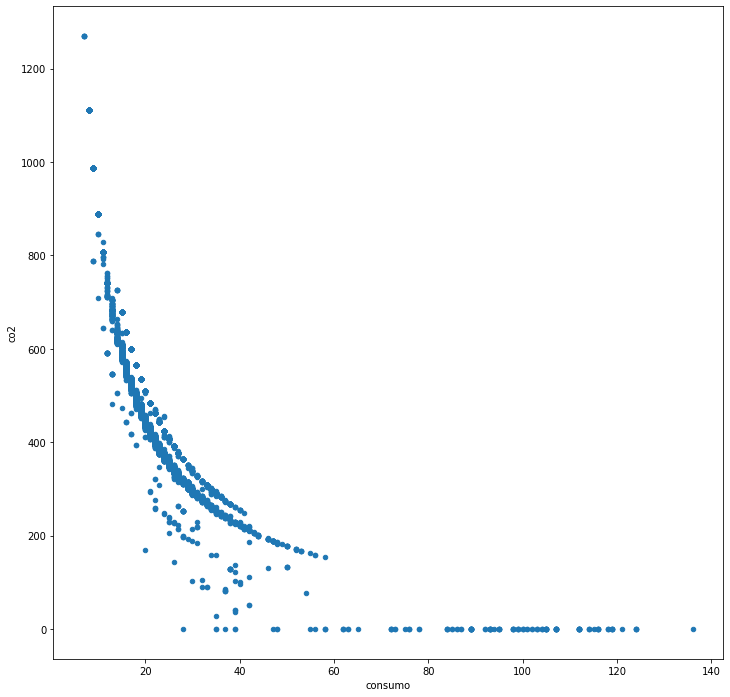

In [31]:
vehiculos.plot.scatter(x="consumo",y="co2")

In [32]:
litros_por_galon =  3.78541

vehiculos["consumo_litros_milla"] = litros_por_galon/ vehiculos.consumo

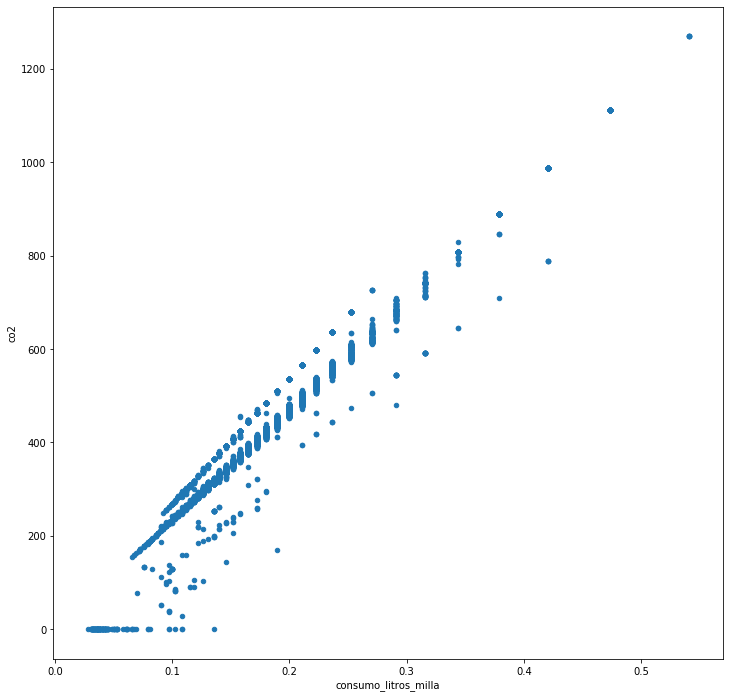

In [33]:
vehiculos.plot.scatter(x="consumo_litros_milla",y="co2");

In [34]:
tipos_consumo = ['muy bajo', 'bajo', 'moderado', 'alto', 'muy alto']

vehiculos['consumo_tipo'] = pd.qcut(vehiculos['consumo_litros_milla'],
                                  5, labels=tipos_consumo)

vehiculos.consumo_tipo.head()

0        alto
1        alto
2    muy alto
3    muy alto
4        alto
Name: consumo_tipo, dtype: category
Categories (5, object): [muy bajo < bajo < moderado < alto < muy alto]

In [35]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588


In [36]:
vehiculos.dtypes

fabricante                object
modelo                    object
year                       int64
desplazamiento           float64
cilindros                float64
transmision               object
traccion                  object
clase                     object
combustible               object
consumo                    int64
co2                      float64
clase_tipo              category
traccion_tipo             object
transmision_tipo        category
combustible_tipo        category
tamano_motor_tipo       category
consumo_tipo            category
co2_tipo                category
consumo_litros_milla     float64
dtype: object

### Conclusion

- La variable `consumo` esta definida en millas por galon y la variable `co2` está definida como gramos por milla. Dado que el co2 es la variable principal del dataset, hemos creado la variable `consumo_litros_milla` definida como litros por milla para poder comparar con `co2`

### Exportar

Generalmente, un formato muy extendido para guardar datos es csv. Esto, que normalmente no es mala idea, no es recomendable entre pasos cuando se está trabajando con python y pandas.

CSV (o `Comma Separated Values`, es decir, Valores separados por comma), es un formato muy simple, que en general consiste de un elemento for fila, y cada campo separado por una coma.

El principal problema que esto tiene es que al guardar datos en csv se pierden todos los datos que pandas a obtenido sobre el dataframe (por ejemplo, que tipo de variable se guarda en cada columna, o que variables son categóricas).

Mi recomendación es usar un formato nativo de python para guardar dataframes entre pasos, y guardar los datos finales a un formato como csv, para que se puedan compartir con otras personas que no usen python.

El formato standard de serialización en Python (y serialización significa básicamente guardar un archivo al disco duro) es `pickle`. Pandas puede leer y escribir a pickle sin problemas, y al leer un archivo pickle es como si nunca hubiesemos cerrado el jupyter notebook, el dataframe no habrá perdido ninguna propiedad.

In [40]:
vehiculos.to_pickle("../../_data/vehiculos.3.variables_agrupadas.pkl")